# **Implementation of K-nearest neighbor classifier**




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

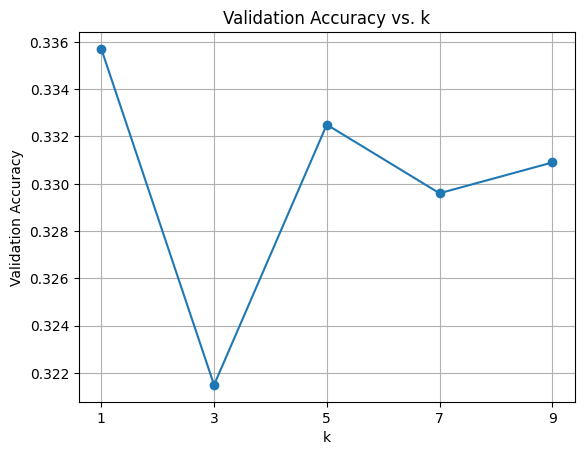

Best k: 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy with best k: 0.3539


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values to the range [0, 1]
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

# Split the dataset into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Initialize a list to store validation accuracies for different k values
val_accuracies = []

# Test different values of k
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train_split, y_train_split)

    # Evaluate on validation set
    accuracy = knn.score(X_val_split, y_val_split)
    val_accuracies.append(accuracy)

# Plot the validation accuracies
plt.plot(k_values, val_accuracies, marker='o')
plt.title('Validation Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose the best k based on validation accuracy
best_k = k_values[np.argmax(val_accuracies)]
print("Best k:", best_k)

# Train the final model with the best k value
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_flat, y_train)

# Final evaluation on test set
test_accuracy = final_knn.score(X_test_flat, y_test)
print("Test Accuracy with best k:", test_accuracy)


# **Implementation of CNN architecture**

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.5718 - accuracy: 0.4194 - val_loss: 1.3123 - val_accuracy: 0.5313
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2171 - accuracy: 0.5669 - val_loss: 1.1010 - val_accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0628 - accuracy: 0.6259 - val_loss: 1.0230 - val_accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9615 - accuracy: 0.6614 - val_loss: 1.0407 - val_accuracy: 0.6386
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8865 - accuracy: 0.6906 - val_loss: 0.9368 - val_accuracy: 0.6745
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8298 - accuracy: 0.7109 - val_loss: 0.8994 - val_accuracy: 0.6880
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7853 - accuracy: 0.7250 - val_loss: 0.8883 - val_accur

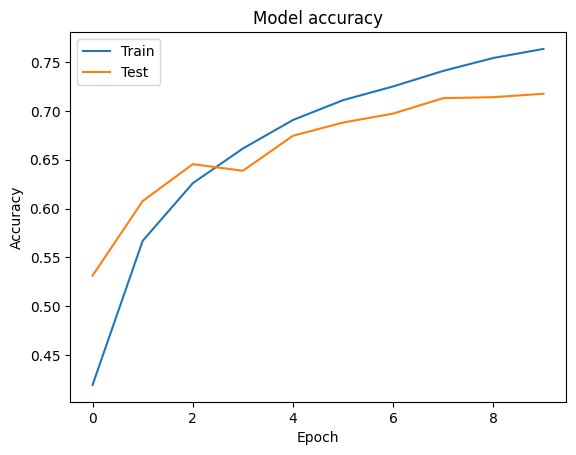

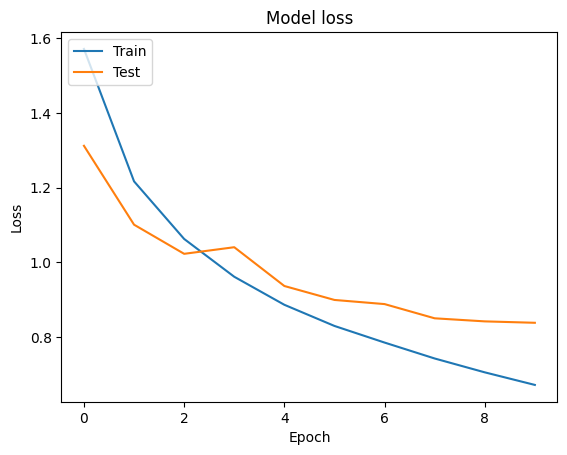

313/313 [==============================] - 1s 2ms/step - loss: 0.8383 - accuracy: 0.7175
Test accuracy: 0.7174999713897705


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


# **Implementation of  Fast R-CNN  pipeline for cifar-10**


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    cifar10_images = x_test  # Use only test images for simplicity
    return cifar10_images

# Load pretrained VGG16 model
def load_pretrained_model(input_shape=(224, 224, 3), num_classes=10):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # Add a logistic layer
    predictions = Dense(num_classes, activation='softmax')(x)

    # Model to train
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# Perform object detection using VGG16 model
def detect_objects(image, model, label_encoder):
    # Resize image to match VGG16 input size
    img = cv2.resize(image, (224, 224))
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)

    # Predict using the model
    features = model.predict(x)
    predicted_label_idx = np.argmax(features)
    predicted_label = label_encoder.inverse_transform([predicted_label_idx])

    return predicted_label

# Load CIFAR-10 images
cifar10_images = load_cifar10()

# Load pretrained VGG16 model
model = load_pretrained_model()

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize label encoder
label_encoder = LabelEncoder()
label_encoder.fit(class_names)

# Perform object detection on CIFAR-10 images
for img in cifar10_images:
    # Detect objects
    predicted_label = detect_objects(img, model, label_encoder)

    # Display results
    print("Detected object:", predicted_label)

print("Object detection completed.")


Streaming output truncated to the last 5000 lines.
Detected object: ['truck']
1/1 [==============================] - 0s 29ms/step
Detected object: ['truck']
1/1 [==============================] - 0s 24ms/step
Detected object: ['ship']
1/1 [==============================] - 0s 20ms/step
Detected object: ['horse']
1/1 [==============================] - 0s 21ms/step
Detected object: ['deer']
1/1 [==============================] - 0s 19ms/step
Detected object: ['airplane']
1/1 [==============================] - 0s 18ms/step
Detected object: ['airplane']
1/1 [==============================] - 0s 20ms/step
Detected object: ['ship']
1/1 [==============================] - 0s 25ms/step
Detected object: ['deer']
1/1 [==============================] - 0s 19ms/step
Detected object: ['deer']
1/1 [==============================] - 0s 26ms/step
Detected object: ['ship']
1/1 [==============================] - 0s 18ms/step
Detected object: ['horse']
1/1 [==============================] - 0s 24ms/step
D

# **Implementation of vision transformer**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define the Vision Transformer model
class VisionTransformer(nn.Module):
    def __init__(self, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, channels=3):
        super(VisionTransformer, self).__init__()
        assert image_size % patch_size == 0, "Image dimensions must be divisible by the patch size."
        num_patches = (image_size // patch_size) ** 2
        patch_dim = channels * patch_size ** 2

        self.patch_size = patch_size
        self.embedding = nn.Conv2d(channels, dim, kernel_size=patch_size, stride=patch_size)
        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dim_feedforward=mlp_dim),
            num_layers=depth
        )
        self.fc = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.embedding(x).flatten(2).transpose(1, 2)  # (B, C, H, W) -> (B, N, D)
        B, N, _ = x.shape
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding[:, :(N + 1)]
        x = self.transformer_encoder(x)
        x = x[:, 0]  # take only the cls_token
        x = self.fc(x)
        return x

# CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

# Initialize and train the Vision Transformer model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionTransformer(image_size=32, patch_size=4, num_classes=10, dim=256, depth=6, heads=8, mlp_dim=512).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Train Loss: {running_loss / len(train_loader):.3f}, Train Accuracy: {train_accuracy:.2f}%")

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")


100%|██████████| 170498071/170498071 [00:03<00:00, 43657090.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch 1/10:   0%|          | 0/782 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 1/10: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]

Train Loss: 2.325, Train Accuracy: 10.12%


Test Accuracy: 10.00%


Epoch 2/10: 100%|██████████| 782/782 [00:34<00:00, 22.59it/s]

Train Loss: 2.316, Train Accuracy: 10.07%


Test Accuracy: 10.00%


Epoch 3/10: 100%|██████████| 782/782 [00:35<00:00, 22.20it/s]

Train Loss: 2.313, Train Accuracy: 9.70%


Test Accuracy: 10.00%


Epoch 4/10: 100%|██████████| 782/782 [00:35<00:00, 22.13it/s]

Train Loss: 2.310, Train Accuracy: 9.94%


Test Accuracy: 10.00%


Epoch 5/10: 100%|██████████| 782/782 [00:39<00:00, 19.93it/s]

Train Loss: 2.308, Train Accuracy: 10.01%


Test Accuracy: 10.00%


Epoch 6/10: 100%|██████████| 782/782 [00:35<00:00, 22.16it/s]

Train Loss: 2.306, Train Accuracy: 9.84%


Test Accuracy: 10.00%


Epoch 7/10: 100%|██████████| 782/782 [00:35<00:00, 22.20it/s]

Train Loss: 2.306, Train Accuracy: 9.88%


Test Accuracy: 10.00%


Epoch 8/10: 100%|██████████| 782/782 [00:35<00:00, 22.14it/s]

Train Loss: 2.305, Train Accuracy: 9.99%


Test Accuracy: 10.00%


Epoch 9/10: 100%|██████████| 782/782 [00:35<00:00, 22.18it/s]

Train Loss: 2.305, Train Accuracy: 10.13%


Test Accuracy: 10.00%


Epoch 10/10: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s]

Train Loss: 2.304, Train Accuracy: 9.87%


Test Accuracy: 10.00%
